In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Problem 1 - Linear Separability 

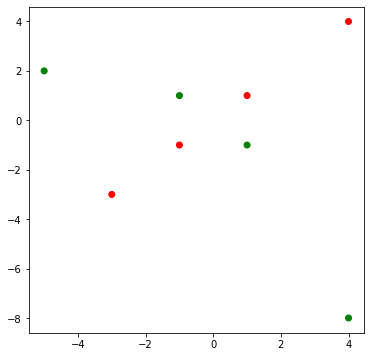

In [110]:
x1 = np.array([[-1,-1], [1, 1], [-3, -3], [4, 4]])
x2 = np.array([[-1,1], [1, -1], [-5, 2], [4, -8]])
x = np.concatenate((x1[:,0], x2[:,0]))
y = np.concatenate((x1[:,1], x2[:,1]))
label = [0,0,0,0,1,1,1,1]
colors =[ 'red','green']
fig = plt.figure(figsize=(6,6))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))
loc = np.arange(0,max(label),max(label)/float(len(colors)))


In [98]:
def linear_kernel(x,y):
    return (1+np.multiply(x,y))

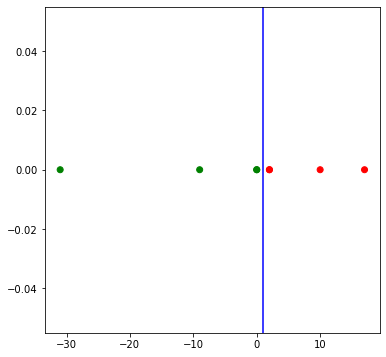

In [109]:
z = linear_kernel(x,y)
y_1 = np.zeros(8)
fig = plt.figure(figsize=(6,6))
plt.axvline(1, color='b', linestyle='-')
plt.scatter(z, y_1, c=label, cmap=matplotlib.colors.ListedColormap(colors))
loc = np.arange(0,max(label),max(label)/float(len(colors)))

#### 1.1 No, because we cannot use a linear classifier (e.g., a straight line) to separate the two classes. See the plot below where red (green) denote feature $x_{1}$($x_{2}$).

#### 1.2 Consider a poly-nominal kernel with degree of 1, let x(y) denote all the points on the x-axis(y-axis) for $x_{1}$ and $x_{2}$ (e.g., np.concatenate((x1[:,0], x2[:,0]))), then we have $z=\phi (x,y) = (1+x^{T}y)$ such that $x_{1}$ and $x_{2}$ are linear separable in an one-dimensional space.

#### 1.3  The hyperplane that differentiates the two classes is the solid blue line in the plot above.

####  1.4 In general, nonlinear transformations using kernel methods (e.g., SVM) allows us to do classification in a high-dimensional space that is not feasible in the original space. With the kernel trick, we can perform the computation much faster.

# Problem 2: Bias Variance Tradeoff, Regularization 


####  

2.1  We essentially want to show that the sample analogue of MSE converges to the true mean as the sample size n goes to infinity. In particular, the latter can then be decomposed into three terms. That is,
$$ \frac{1}{t}\sum^{t}_{i=1}(f(x_{i})+\varepsilon-g(x_{i}))^{2}\rightarrow_{p} E(MSE)= Bias^{2} + Variance + Noise.$$
To simply derivations, let's first setting $y = f(x)+\varepsilon$ and $\hat{y}=g(x)$:

\begin{align*}
&E(MSE) =E[(y-\hat{y})^{2}]=E[(y-E(\hat{y})+E(\hat{y})-\hat{y})^{2}]&\\
&=E[(y-E(\hat{y}))^{2}]+E[(E(\hat{y})-\hat{y}))^{2}]-2E[(y-E(\hat{y}))(E(\hat{y})-\hat{y})]&\\
&=E[(y-E(\hat{y}))^{2}]+E[(\hat{y}-E(\hat{y})))^{2}]-2E[(y-E(\hat{y}))(E(\hat{y})-\hat{y})]&\\
&=E[(y-E(\hat{y}))^{2}]+E[(\hat{y}-E(\hat{y})))^{2}]-2\bigg[E[(y-E(\hat{y}))E(\hat{y})-E(y-E(\hat{y}))E(\hat{y})\bigg]&\\
&=E[(y-E(\hat{y}))^{2}]+E[(\hat{y}-E(\hat{y})))^{2}]\\
% &=var(\hat{y})+Bias(\hat{y},y)+Noise
\end{align*}
The second equality adds and subtracts the same term $E(\hat{y})$. The third and fourth qualities open the quadratic function and then re-arriange. The fifth equality  splits the two pieces of the third term and noting that the first piece $E(y-E(\hat{y}))E(\hat{y})$ equals the second piece $E(y-E(\hat{y}))E(\hat{y})$ after taking the expectation. \\
\\
Now, substituting $f(x)+\varepsilon=y$ and $g(x)=\hat{y}$ back to the equation, we have:
% \scriptsize
\begin{align*}
&=E\bigg[(f(x)+\varepsilon-E(g(x))^{2}\bigg]+E\bigg[g(x)-E(g(x))^{2}\bigg]&\\
&=E\bigg[(f(x)-E(g(x)))^{2}+ \varepsilon^{2}+2(f(x)-E(g(x)))(\varepsilon)\bigg]+E\bigg[g(x)-E(g(x))^{2}\bigg]&\\
&=E[(E(g(x))-f(x))^{2}]+E[ \varepsilon^{2}]+2E[(f(x)-E(g(x)))(\varepsilon)]+E[g(x)-E(g(x))^{2}]&\\
&=E[(E(g(x))-f(x))^{2}]+Var(\varepsilon)+2E[(f(x)-E(g(x)))E(\varepsilon)]+E[g(x)-E(g(x))^{2}]&\\
&=Bias^{2}+Noise+Variance&\\
\end{align*}
The second equality opens the quadratic function. The third equality takes expectation for each term separately. The forth equality makes a substitution using the fact that $E(\varepsilon^{2})=Var(\varepsilon)$, as the error term is mean zero (i.e., $E(\varepsilon)^{2}$=0). The second to last equality gets rid of the third term because again the error term is mean zero.

In [336]:
np.random.seed(0)

x = np.sort(np.random.randn(20)) # 
x_ax = np.linspace(0, 1, 20) 
f_x = x + np.sin(1.5*x)
res = 0.3 * np.random.randn(20)       #
y = f_x + res  

x,f_x,y,res

(array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
         0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
         0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
         1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ]),
 array([-1.97178306, -1.81243886, -0.50806137, -0.3764476 , -0.25742929,
         0.30317595,  0.35843171,  0.76559871,  0.81354868,  0.96499429,
         0.98829005,  1.06154765,  1.67032014,  1.93949821,  1.97347006,
         2.27356967,  2.27770057,  2.23953636,  2.2012861 ,  2.02291034]),
 array([-2.73768001, -1.61635328, -0.24873051, -0.59909711,  0.4234971 ,
        -0.13313375,  0.37215926,  0.70944355,  1.27338244,  1.40580192,
         1.03477428,  1.17499641,  1.40398442,  1.34525927,  1.86909642,
         2.32047436,  2.64678777,  2.60025031,  2.08508806,  1.93221952]),
 array([-0.76589694,  0.19608558,  0.25933086, -0.22264951,  0.68092639,
        -0.4363097 ,  0.01372756, -0.05615516

#### 2.2 The required dataset and plots are below.

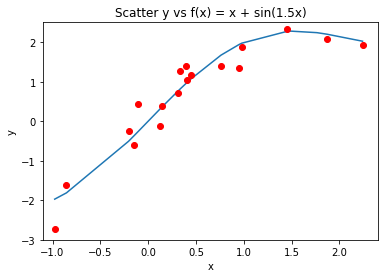

In [337]:
plt.figure(figsize=(6, 4))
# poly_f_x = np.poly1d(np.polyfit(x,f_x,1))(x)
# plt.plot(x,poly_f_x)
plt.plot(x, f_x)   # scatter plot 
plt.plot(x, y, 'ro')   # scatter plot 
plt.title('Scatter y vs f(x) = x + sin(1.5x)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1.1, 2.4])
plt.ylim([-3, 2.5])
plt.show()

#### 2.3 The four required plots are below. Note that I use the top left graph to plot scatter y and f(x), where f(x) is approximated by a polynominal regression of degree 1. The results are similar but still different from $g_{1}(x)$ (see the coefficients). Lastly, from the plots, I think $f(x)$ and $g_{1}(x)$  are slightly underfitting, whereas  $g_{10}(x)$ is overfitting.

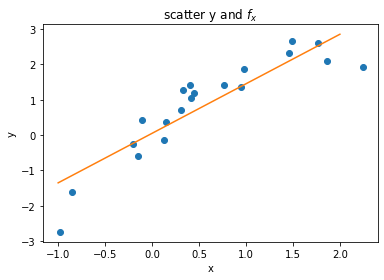

The coeffiicents are: [1.39992802 0.04935847]


In [339]:
plt.figure(figsize=(6, 4))
d=np.polyfit(x, f_x, 1) 
p = np.poly1d(d )
t = np.linspace(-1, 2, 20)
plt.plot(x, y, 'o', t, p(t), '-')
plt.title('scatter y and $f_{x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print ("The coeffiicents are:",d)

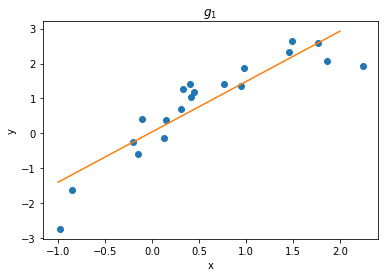

The coeffiicents are: [1.44127214 0.04254493]


In [299]:
np.random.seed(0)
# x = np.linspace(0, 1, 20)
# y = x+ np.sin(x) + 0.3*np.random.rand(20)
plt.figure(figsize=(6, 4))
d=np.polyfit(x, y, 1) 
p = np.poly1d(d )
t = np.linspace(-1, 2, 20)
plt.plot(x, y, 'o', t, p(t), '-')
plt.title('$g_{1}$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print ("The coeffiicents are:",d)

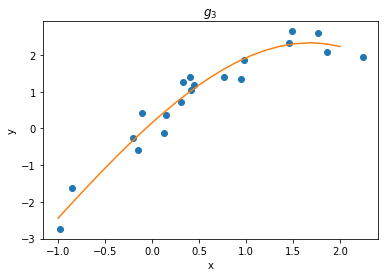

The coeffiicents are: [-0.10546906 -0.41443629  2.28915288  0.15522005]


In [300]:
plt.figure(figsize=(6, 4))
d=np.polyfit(x, y, 3) 
p = np.poly1d(d )
t = np.linspace(-1, 2, 20)
plt.plot(x, y, 'o', t, p(t), '-')
plt.title('$g_{3}$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print ("The coeffiicents are:",d)

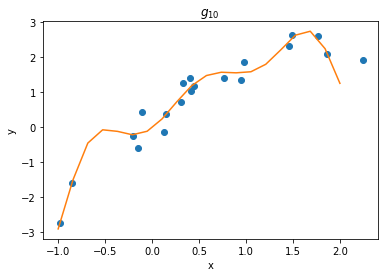

The coeffiicents are: [-0.06218374  0.33451539  0.51996437 -4.47762895  3.41322186  8.59241884
 -9.32154855 -4.22048657  4.7992108   2.00937813 -0.03038985]


In [301]:
plt.figure(figsize=(6, 4))
d=np.polyfit(x, y, 10) 
p = np.poly1d(d )
t = np.linspace(-1, 2, 20)
plt.plot(x, y, 'o', t, p(t), '-')
plt.title('$g_{10}$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print ("The coeffiicents are:",d)

####  2.4 The required plot are below.\footnote{Note that this part's base code I borrowed from https://dustinstansbury.github.io/theclevermachine/bias-variance-tradeoff. I then modified to suit my needs for this question.} Basically, I stored the average MSE, biased, and variance across 100 simulations by complexity (e.g., from $g_{1}$ to $g_{15}$) and plot the evolution accordingly. It seems to me that the best model is $g_{3}$.

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import RidgeCV
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit,polyval

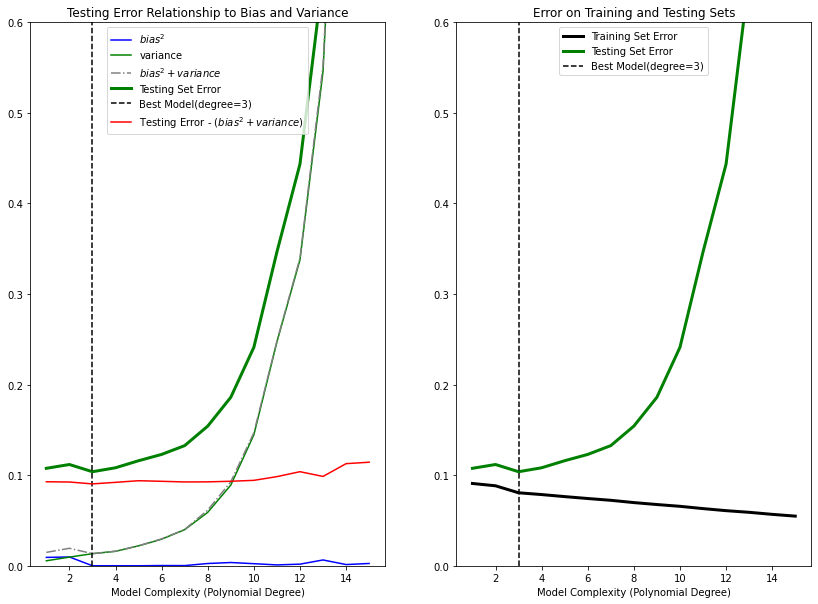

In [342]:
# Question 2 part 4's base code are mostly borrowed from https://dustinstansbury.github.io/theclevermachine/bias-variance-tradeoff 
# after modifiticaiton to this problem set 

np.random.seed(0)

def error_function(pred, actual):
    return (pred - actual) ** 2

def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)

def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


def f(x):
    return x+ np.sin(1.5*x)

model_poly_degrees = range(1, 16)
percent_train = .8
n_train = int(np.ceil(50 * percent_train))
x = np.linspace(-1, 1, 50)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]
ERROR_COLOR = 'green'
DATA_COLOR = 'black'

theta_hat = defaultdict(list)
pred_train = defaultdict(list)
pred_test = defaultdict(list)
train_errors = defaultdict(list)
test_errors = defaultdict(list)


for dataset in range(100):

    y_train = f(x_train) + 0.3 * np.random.randn(*x_train.shape)
    y_test = f(x_test) + 0.3 * np.random.randn(*x_test.shape)

    for degree in model_poly_degrees:
  
        tmp_theta_hat = polyfit(x_train, y_train, degree)
        tmp_pred_train = polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)
        tmp_pred_test = polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))


    complexity_train_error = []
    complexity_test_error = []
    bias_squared = []
    variance = []
    for degree in model_poly_degrees:
        complexity_train_error.append(np.mean(train_errors[degree]))
        complexity_test_error.append(np.mean(test_errors[degree]))
        bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
        variance.append(calculate_estimator_variance(pred_test[degree]))

        
best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]



# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^2 + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^2 + variance$)')
# plt.axhline(0.3 **2, color='tomato', linestyle='--', label=f'$\sigma_^2$ = {round(0.3**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .6]);
plt.title('Testing Error Relationship to Bias and Variance')
plt.legend(loc='upper center')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.ylim([0, .6]);
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')

In [305]:
# np.random.seed(1)
# x = np.sort(np.random.randn(50))
# f_x = x+ np.sin(1.5*x)
# data = [f_x +  0.3 * np.random.randn(50)   for i in range(100)]

# temp_mse = []
# temp_bias = []
# temp_var = []

# t_byc = []
# t_bias = []
# t_var = []

# mse_byc = []
# bias_byc = []
# var_byc = []

# for i in range(100):
#     X_train, X_test, Y_train, Y_test = train_test_split(x, data[i], test_size=0.20,random_state=0)
    
#     for k in range(1,16):
#         poly = PolynomialFeatures(degree=k)
#         x_poly = poly.fit_transform(x.reshape(-1, 1))
#         poly_reg = linear_model.LinearRegression()
#         poly_reg.fit(X_train.reshape(-1, 1), Y_train)
#         mse, bias, var = bias_variance_decomp(poly_reg, X_train.reshape(-1, 1), Y_train.flatten(), X_test.reshape(-1, 1), Y_test.flatten(), loss='mse', num_rounds=40, random_seed=1)
#         temp_mse.append(mse)    
#         temp_bias.append(bias)   
#         temp_var.append(var)
        
# for j in range(1,16):
#     for i in range(0,15):
#         t_byc.append(temp_mse[100*i+j])
#         t_bias.append(temp_bias[100*i+j])
#         t_var.append(temp_var[100*i+j])

#     mse_byc.append(np.mean(t_byc))
#     bias_byc.append(np.mean(t_bias))
#     var_byc.append(np.mean(t_var))
    
    
# x_axis=range(1,16)

# #Plotting
# fig = plt.figure(figsize=(6,4))
# plt.plot(x_axis,mse_byc,label='MSE')
# plt.plot(x_axis,bias_byc,label='$Bias^{2}$')
# plt.plot(x_axis,var_byc, label='Variance')
# plt.legend()


# print("The complexity order based on MSE:",np.argsort(np.array(mse_byc)))
# # print("The complexity order based on $Bias^{2}$:",np.argsort(np.array(bias_byc)))
# # print("The complexity order based on Variance:",np.argsort(np.array(var_byc)))

#### 2.5 The regularized model both has higher bias and MSE compared to the unregularized 10-polynominal model. The intuitions behind is that regularized $L_{2}$ model typically will smooth the weights associated with each of the 10 coefficents, therefore, making it 'less fit' to the data relative to the unregularized one, thus increasing the biasness. The MSE is also proportionally increasing due to Regularization.

In [119]:
np.random.seed(2)
x = np.random.randn(50)
f_x = x+ np.sin(1.5*x)
y =f_x +  0.3 * np.random.randn(50)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20,random_state=2)

poly = PolynomialFeatures(degree=10)
x_poly = poly.fit_transform(x.reshape(-1, 1))
poly_reg = linear_model.LinearRegression()
poly_reg.fit(X_train.reshape(-1, 1), Y_train)
mse, bias, var = bias_variance_decomp(poly_reg, X_train.reshape(-1, 1), Y_train.flatten(), X_test.reshape(-1, 1), Y_test.flatten(), loss='mse', num_rounds=40, random_seed=2)

poly_ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train.reshape(-1, 1),Y_train)
mse_r, bias_r, var_r = bias_variance_decomp(poly_ridge, X_train.reshape(-1, 1), Y_train, X_test.reshape(-1, 1), Y_test, loss='mse', num_rounds=40, random_seed=2)

print("The MSE is :",mse)
print("The Bias is :",bias)
print("The Variance is :",var)

print("The MSE of the regularized model is :",mse_r)
print("The Bias of the regularized model is :",bias_r)
print("The Variance of the regularized model is :",var_r)

The MSE is : 0.47879261519416466
The Bias is : 0.4591954756322495
The Variance is : 0.019597139561915097
The MSE of the regularized model is : 0.5014476467101757
The Bias of the regularized model is : 0.4819350098202544
The Variance of the regularized model is : 0.019512636889921265


# Problem 3:  OpenML, Algorithmic Performance Scaling

#### 3.1 Two datasets downloaded from OpenML:

steel-plates-fault: 34 features, 1941 instances, 2 classes, 27 numerical features, 7 categorical features.For the classification task, I use 'Z$\_$Scratch' and  'Dirtiness' for outcome variables.

Data source and summary statistics: https://www.openml.org/search?type=data&sort=runs&status=active&id=1504.

banknote-authentication: 5 features, 1372 instances, 2 classes, 4 numerical features, 1 categorical features.

Data source and summary statistics: https://www.openml.org/search?type=data&sort=runs&status=active&id=1462.



In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import  accuracy_score,classification_report, confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve,auc
from sklearn.linear_model import LogisticRegression

In [15]:
bank = pd.read_csv('BankNoteAuthentication.csv')

In [38]:
bank.info(),bank.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


(None,
      variance  skewness  curtosis   entropy  class
 946 -0.001285   0.13863  -0.19651  0.008175      1
 691  0.570600  -0.02480   1.24210 -0.562100      0)

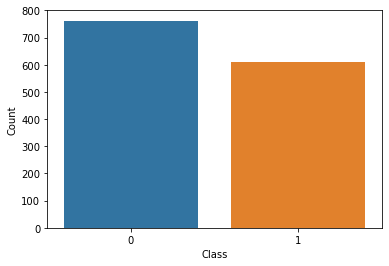

In [37]:
value_count =  bank['class'].value_counts()
ax = sn.barplot(x=value_count.index,y=value_count.values,data=bank)
ax.set(xlabel='Class', ylabel='Count')
plt.show()

In [90]:
warnings.filterwarnings("ignore")
x = bank.iloc[:,:4]
y = bank.iloc[:,4:]

time_rf = []
acc_rf = []
time_gb = []
acc_gb = []

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20,random_state=3)

# lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# for i in lr_list:
#     GB_l = GradientBoostingClassifier(learning_rate=i, random_state=3)
#     GB_l.fit(X_train, Y_train)
    
#     print("Learning rate: ", i)
#     print("Accuracy score (training): {0:.3f}".format(GB_l.score(X_train, Y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(GB_l.score(X_test, Y_test)))


RF = RandomForestClassifier()

for i in reversed(range(1,10,1)):
    s_X_train, s_X_test, s_Y_train, s_Y_test = train_test_split(X_train, Y_train, test_size=0.1*i)
    start = time.time()
    RF.fit(s_X_train, s_Y_train)
    end = time.time()
    time_rf.append((end-start)*100)
    s_y_pred = RF.predict(s_X_test)
    acc_rf.append(accuracy_score(s_Y_test, s_y_pred))
    
    
GB = GradientBoostingClassifier(learning_rate=.75, random_state=3)

for i in reversed(range(1,10,1)):
    s_X_train, s_X_test, s_Y_train, s_Y_test = train_test_split(X_train, Y_train, test_size=0.1*i)
    start = time.time()
    GB.fit(s_X_train, s_Y_train)
    end = time.time()
    time_gb.append((end-start)*100)
    s_y_pred = GB.predict(s_X_test)
    acc_gb.append(accuracy_score(s_Y_test, s_y_pred))


####  (ii) and (iii) Starting with the steel-plates-fault dataset and let me present the code of the first outcome of interest as an example.  The x-axis denotes the proportion of randomly selected training set size range from 10\% to 90\%. Its obvious that the running time increases as the size of training set increases for both algorithms. For the same training set size, gradient boost runs faster and have higher accuracy overall then random forest for the first outcome of interest. The opposite is true for the second outcome of interset. The main takeaway for me is that the relative speed and performance of the algorithms are sensitive to the choices of outcome values.

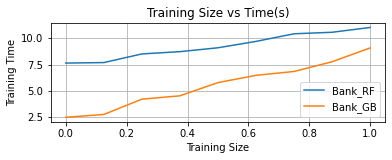

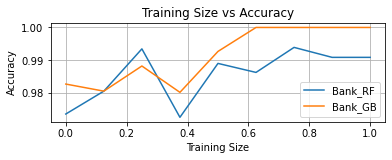

In [94]:
x_axis = np.linspace(0,1,9)

#Plotting test size vs training time of Random Forest Classifier on Dataset 1 & 2
plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.title('Training Size vs Time(s)')
plt.xlabel("Training Size")
plt.ylabel("Training Time")
plt.plot(x_axis, time_rf, label='Bank_RF')
plt.plot(x_axis, time_gb, label='Bank_GB')
plt.legend()
plt.grid()


plt.figure(figsize=(6,4))
plt.subplot(2,1,2)
plt.title('Training Size vs Accuracy')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.plot(x_axis, acc_rf, label='Bank_RF')
plt.plot(x_axis, acc_gb, label='Bank_GB')

plt.legend()
plt.grid()

In [95]:
faults = pd.read_csv('faults.csv')


In [98]:
faults.info(),faults.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

(None,
      X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
 273        322        357    1747625    1747660           314           84   
 864        616        622    2224908    2224928            87           15   
 
      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
 273           50              38597                    110   
 864           20              10196                    109   
 
      Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
 273                    140  ...                0.0           -0.0397   
 864                    127  ...                0.7           -0.0844   
 
      SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
 273          0.9979       0          1         0       0          0      0   
 864          0.2288       0          0         0       0          1      0   
 
      Other_Faults  
 273             0  
 864             0  
 
 [2 rows x 34 columns])

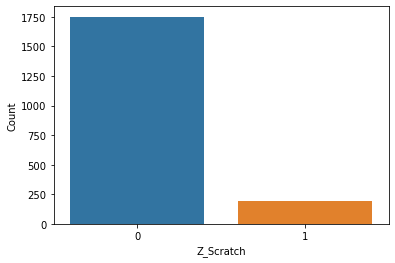

In [101]:
value_count =  faults['Z_Scratch'].value_counts()
ax = sn.barplot(x=value_count.index,y=value_count.values,data=bank)
ax.set(xlabel='Z_Scratch', ylabel='Count')
plt.show()

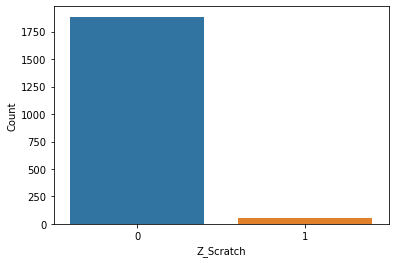

In [102]:
value_count =  faults['Dirtiness'].value_counts()
ax = sn.barplot(x=value_count.index,y=value_count.values,data=bank)
ax.set(xlabel='Z_Scratch', ylabel='Count')
plt.show()

In [107]:
warnings.filterwarnings("ignore")
x = faults.iloc[:,:27]
y_1 = faults['Z_Scratch']
y_2 = faults['Dirtiness']

In [111]:
time_rf_1 = []
acc_rf_1 = []
time_gb_1 = []
acc_gb_1 = []

X_train, X_test, Y_train, Y_test = train_test_split(x, y_1, test_size=0.20,random_state=3)

# lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# for i in lr_list:
#     GB_l = GradientBoostingClassifier(learning_rate=i, random_state=3)
#     GB_l.fit(X_train, Y_train)
    
#     print("Learning rate: ", i)
#     print("Accuracy score (training): {0:.3f}".format(GB_l.score(X_train, Y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(GB_l.score(X_test, Y_test)))


RF = RandomForestClassifier()

for i in reversed(range(1,10,1)):
    s_X_train, s_X_test, s_Y_train, s_Y_test = train_test_split(X_train, Y_train, test_size=0.1*i)
    start = time.time()
    RF.fit(s_X_train, s_Y_train)
    end = time.time()
    time_rf_1.append((end-start)*100)
    s_y_pred = RF.predict(s_X_test)
    acc_rf_1.append(accuracy_score(s_Y_test, s_y_pred))
    
    
GB = GradientBoostingClassifier(learning_rate=.5, random_state=3)

for i in reversed(range(1,10,1)):
    s_X_train, s_X_test, s_Y_train, s_Y_test = train_test_split(X_train, Y_train, test_size=0.1*i)
    start = time.time()
    GB.fit(s_X_train, s_Y_train)
    end = time.time()
    time_gb_1.append((end-start)*100)
    s_y_pred = GB.predict(s_X_test)
    acc_gb_1.append(accuracy_score(s_Y_test, s_y_pred))


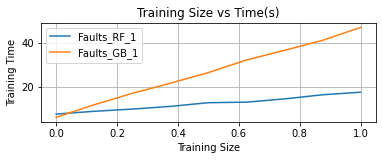

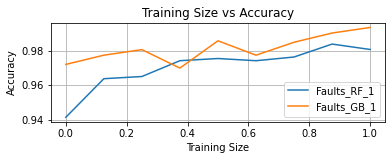

In [112]:
x_axis = np.linspace(0,1,9)


plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.title('Training Size vs Time(s)')
plt.xlabel("Training Size")
plt.ylabel("Training Time")
plt.plot(x_axis, time_rf_1, label='Faults_RF_1')
plt.plot(x_axis, time_gb_1, label='Faults_GB_1')
plt.legend()
plt.grid()


plt.figure(figsize=(6,4))
plt.subplot(2,1,2)
plt.title('Training Size vs Accuracy')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.plot(x_axis, acc_rf_1, label='Faults_RF_1')
plt.plot(x_axis, acc_gb_1, label='Faults_GB_1')

plt.legend()
plt.grid()

In [115]:
time_rf_2 = []
acc_rf_2 = []
time_gb_2 = []
acc_gb_2 = []

X_train, X_test, Y_train, Y_test = train_test_split(x, y_2, test_size=0.20,random_state=3)

# lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# for i in lr_list:
#     GB_l = GradientBoostingClassifier(learning_rate=i, random_state=3)
#     GB_l.fit(X_train, Y_train)
    
#     print("Learning rate: ", i)
#     print("Accuracy score (training): {0:.3f}".format(GB_l.score(X_train, Y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(GB_l.score(X_test, Y_test)))


RF = RandomForestClassifier()

for i in reversed(range(1,10,1)):
    s_X_train, s_X_test, s_Y_train, s_Y_test = train_test_split(X_train, Y_train, test_size=0.1*i)
    start = time.time()
    RF.fit(s_X_train, s_Y_train)
    end = time.time()
    time_rf_2.append((end-start)*100)
    s_y_pred = RF.predict(s_X_test)
    acc_rf_2.append(accuracy_score(s_Y_test, s_y_pred))
    
    
GB = GradientBoostingClassifier(learning_rate=1, random_state=3)

for i in reversed(range(1,10,1)):
    s_X_train, s_X_test, s_Y_train, s_Y_test = train_test_split(X_train, Y_train, test_size=0.1*i)
    start = time.time()
    GB.fit(s_X_train, s_Y_train)
    end = time.time()
    time_gb_2.append((end-start)*100)
    s_y_pred = GB.predict(s_X_test)
    acc_gb_2.append(accuracy_score(s_Y_test, s_y_pred))


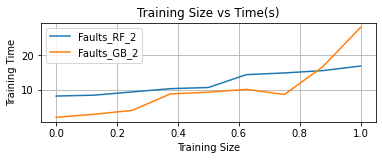

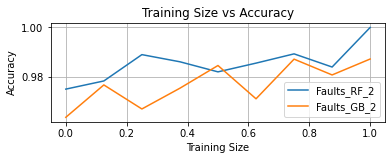

In [116]:
x_axis = np.linspace(0,1,9)

plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.title('Training Size vs Time(s)')
plt.xlabel("Training Size")
plt.ylabel("Training Time")
plt.plot(x_axis, time_rf_2, label='Faults_RF_2')
plt.plot(x_axis, time_gb_2, label='Faults_GB_2')
plt.legend()
plt.grid()


plt.figure(figsize=(6,4))
plt.subplot(2,1,2)
plt.title('Training Size vs Accuracy')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.plot(x_axis, acc_rf_2, label='Faults_RF_2')
plt.plot(x_axis, acc_gb_2, label='Faults_GB_2')

plt.legend()
plt.grid()

#### For the banknote-authentication dataset, the same pattern is observed for the training size and running time. It also seems that gradient boost performs better than random forest, though the latter runs faster, in general.

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import  accuracy_score,classification_report, confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
from prg import prg 

# Problem 4: Precision, Recall, and ROC

#### 4.1 

True negative will affect ROC but not PR curve. The x-axis of the ROC curve is False positive rate= $\frac{False Positive}{False Positive+ True Negative}$; since the denominator requires information about true negative, it affects ROC curve. On the other hand, PR curve plots Recall (True positive rate) on the x-axis against Precision($\frac{True Positive}{True Positive+ False Positive}$), which do not require information about True negative. 

Theorem 3.1 of ICML 2006 gives us the answer, that is, there is a one-to-one relationship between the two curves if recall $\neq$ 0. Moreover, Theorem 3.2 of ICML 2006 layout the general rule of thumb: Algorithm A dominates B in ROC curve if and only if the same order carry through in PR curve.  
    
The short answer why each point on ROC corresponds to a unique point on PR curve is that when the deadset is fixed, meaning we know the number of true negative in the sample, then we have a unique confusion matrix, and thus we can match the two curves precisely. 

In [3]:
warnings.filterwarnings("ignore")
faults = pd.read_csv('faults.csv')
x = faults.iloc[:,:27]
y_1 = faults['Z_Scratch']

X_train, X_test, Y_train, Y_test = train_test_split(x, y_1, test_size=0.20,random_state=3)

AB = AdaBoostClassifier()
AB.fit(X_train, Y_train)
AB_y_pred = AB.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, AB_y_pred, pos_label=1)
precision, recall, thresholds = precision_recall_curve(Y_test, AB_y_pred, pos_label=1)

LR= LogisticRegression()
LR.fit(X_train, Y_train)
LR_y_pred = LR.predict(X_test)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, LR_y_pred, pos_label=1)
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(Y_test, LR_y_pred, pos_label=1)

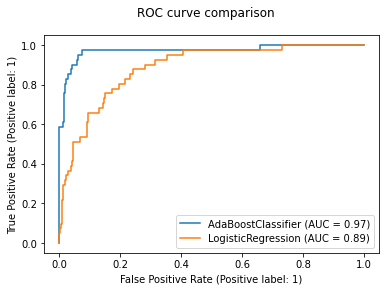

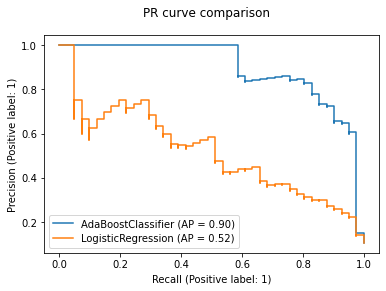

In [15]:
AB_disp = plot_roc_curve(AB, X_test, Y_test)
LR_disp = plot_roc_curve(LR, X_test, Y_test, ax=AB_disp.ax_)
LR_disp.figure_.suptitle("ROC curve comparison")

plt.show()

AB_disp = plot_precision_recall_curve(AB, X_test, Y_test)
LR_disp = plot_precision_recall_curve(LR, X_test, Y_test, ax=AB_disp.ax_)
LR_disp.figure_.suptitle("PR curve comparison")

plt.show()

#### 4.2 The two plots and my codes are above. The points where an all positive classifier lie in the top right of the ROC curve is (1,1) and lie in the bottom right of the PR curve is (1,0.2). This is because the true positive rate needs to be 1 for all positive classifier on ROC curve, which corresponds to recall = 1 in the PR curve as well.

In [18]:
print("AdaBoost AUROC:", roc_auc_score(Y_test,AB_y_pred))
print("Logistic Regression AUROC:",roc_auc_score(Y_test,LR_y_pred))


print("Adaboost AUPR:",auc(recall, precision))
print("Logistic Regression AUPR:", auc(recall_lr, precision_lr))



AdaBoost AUROC: 0.8938183347350714
Logistic Regression AUROC: 0.5
Adaboost AUPR: 0.8357987238167814
Logistic Regression AUPR: 0.5526992287917738


#### 4.3 

AUROC  and AUPR for two classifiers are presented below. Basically, from these two measures we learned that AdaBoost has done a better job than Logistic when it comes to classification. For AUPRG, it can be recovered by first calculating the precision gain and recall gain based on the definitions from NIPS 2015 paper, which I presented below. 
    
If the practitioners want to make their case based on both PR curve and F-score, then it is sensible to consider PR-gain curves proposed by NIPS 2015, because F-score using harmonic mean which is inconsistent with arithmetic mean estimate of PR curve. 

In [9]:
CM = confusion_matrix(Y_test, AB_y_pred)
CM_lr = confusion_matrix(Y_test, LR_y_pred)

TP = CM[0][0]
FP = CM[1][0]
TN = CM[1][1]
FN = CM[0][1]


TP_lr = CM_lr[0][0]
FP_lr = CM_lr[1][0]
TN_lr = CM_lr[1][1]
FN_lr = CM_lr[0][1]

n_pos = TP + FN
n_neg = FP + TN

prec_gain = 1 - (n_pos/n_neg) * (FP/TP)
rgc_gain = 1 - (n_pos/n_neg) * (FN/TP)

n_pos_lr = TP_lr + FN_lr
n_neg_lr = FP_lr + TN_lr


prec_gain_lr = 1 - (n_pos_lr/n_neg_lr) * (FP_lr/TP_lr)
rgc_gain_lr = 1 - (n_pos_lr/n_neg_lr) * (FN_lr/TP_lr)



print("Adaboost (Precision Gain,Recall Gain):", (prec_gain, rgc_gain))
print("Logistic Regression (Precision Gain,Recall Gain):", (prec_gain_lr, rgc_gain_lr))
print("Adaboost AUPRG:",prg.calc_auprg(prg.create_prg_curve(np.array(Y_test), AB_y_pred)))
print("Logistic AUPRG:",prg.calc_auprg(prg.create_prg_curve(np.array(Y_test), LR_y_pred)))


Adaboost (Precision Gain,Recall Gain): (0.8014548566538298, 0.8510911424903722)
Logistic Regression (Precision Gain,Recall Gain): (0.0, 1.0)
Adaboost AUPRG: 0.9646040631880001
Logistic AUPRG: 0.0
